In [8]:
import numpy as np
import linecache


filepath = "testfilename"

def count_lines(filepath: str) -> int:
    with open(filepath, 'r') as file:
        return sum(1 for _ in file)

n_runs = int((count_lines(filepath) - 2)/3)


class SimulationRun:

    def __init__(self,seed:int, n_voters:int, 
                 q:float, final_state:str,
                 disagreeing_components_exist:bool,
                 n_vot_moves:int, n_del_moves:int,
                 final_opinion_one:int, n_conn_comp:int,
                 minimal_degree:int, maximal_degree:int,
                 opinions:np.ndarray,component_numbers:np.ndarray):
        self.seed = seed
        self.n_voters = n_voters
        self.q = q
        self.final_state = final_state
        self.disagreeing_components_exist = disagreeing_components_exist
        self.n_vot_moves = n_vot_moves
        self.n_del_moves = n_del_moves
        self.final_opinion_one = final_opinion_one
        self.n_conn_comp = n_conn_comp
        self.minimal_degree = minimal_degree
        self.maximal_degree = maximal_degree
        self.opinions = opinions
        self.component_numbers = component_numbers

    def __init__(self, params:str, opinions:str, component_numbers:str):
        
        self.component_numbers = self.read_int_vector(component_numbers)
        self.opinions = self.read_int_vector(opinions)

        params = params.split(",")

        self.seed = int(params[0])
        self.n_voters = int(params[1])
        self.q = float(params[2])
        self.final_state = params[3]
        self.disagreeing_components_exist = int(params[4])

        self.n_vot_moves = int(params[5])
        self.n_del_moves = int(params[6])
        self.final_opinion_one = int(params[7])
        self.n_conn_comp = int(params[8])
        self.minimal_degree = int(params[9])
        self.maximal_degree = int(params[10])


    def read_int_vector(self, line):
        return np.fromstring(line,sep=",")


runs_list = []
split_list = []
consensus_list = []
unfinished_list = []


for i in range(n_runs):
    params_line = linecache.getline(filepath, 3*i + 3).strip()
    opinions_line = linecache.getline(filepath, 3*i +4).strip()
    comp_line = linecache.getline(filepath, 3*i + 5).strip()

    run = SimulationRun(params_line, opinions_line, comp_line)

    runs_list.append(run)

    if run.final_state == "real_split":
        split_list.append(run)


In [9]:
number_split_runs = len(split_list)
max_num_connected_components = 0
min_num_connected_components = 10000000

for run in split_list:
    if run.n_conn_comp > max_num_connected_components:
        max_num_connected_components = run.n_conn_comp
    if run.n_conn_comp < min_num_connected_components:
        min_num_connected_components = run.n_conn_comp


vot_moves = np.zeros(number_split_runs)
del_moves = np.zeros(number_split_runs)
num_components = np.zeros(number_split_runs)


two_largest_components = np.zeros((number_split_runs, 2))


for i, run in enumerate(split_list):
    sorted_conn_comp_sizes = np.array(sorted(np.unique(split_list[i].component_numbers, return_counts=True)[1],reverse=True))

    
    #print(sorted_conn_comp_sizes.sum())
    #assert sorted_conn_comp_sizes.sum() == 1024

    assert run.q == 0.3

    vot_moves[i] = split_list[i].n_vot_moves
    del_moves[i] = split_list[i].n_del_moves
    num_components[i] = split_list[i].n_conn_comp

    two_largest_components[i,0] = sorted_conn_comp_sizes[0]
    two_largest_components[i,1] = sorted_conn_comp_sizes[1]

In [10]:
sorted(two_largest_components[:,0])

[480.0,
 488.0,
 490.0,
 496.0,
 496.0,
 496.0,
 497.0,
 498.0,
 498.0,
 498.0,
 499.0,
 499.0,
 499.0,
 499.0,
 499.0,
 499.0,
 500.0,
 503.0,
 505.0,
 505.0,
 506.0,
 506.0,
 506.0,
 506.0,
 508.0,
 508.0,
 509.0,
 510.0,
 511.0,
 513.0,
 513.0,
 515.0,
 516.0,
 516.0,
 517.0,
 517.0,
 520.0,
 522.0,
 522.0,
 523.0,
 523.0,
 524.0,
 524.0,
 525.0,
 525.0,
 526.0,
 527.0,
 528.0,
 529.0,
 529.0,
 529.0,
 530.0,
 531.0,
 531.0,
 531.0,
 532.0,
 533.0,
 533.0,
 534.0,
 535.0,
 536.0,
 537.0,
 538.0,
 540.0,
 540.0,
 540.0,
 542.0,
 542.0,
 543.0,
 544.0,
 546.0,
 546.0,
 548.0,
 548.0,
 549.0,
 550.0,
 550.0,
 550.0,
 552.0,
 552.0,
 553.0,
 555.0,
 555.0,
 556.0,
 558.0,
 561.0,
 561.0,
 562.0,
 563.0,
 565.0,
 565.0,
 565.0,
 565.0,
 566.0,
 568.0,
 570.0,
 571.0,
 575.0,
 576.0,
 577.0,
 578.0,
 580.0,
 581.0,
 581.0,
 581.0,
 582.0,
 582.0,
 583.0,
 584.0,
 584.0,
 586.0,
 589.0,
 590.0,
 591.0,
 592.0,
 593.0,
 593.0,
 594.0,
 594.0,
 595.0,
 596.0,
 597.0,
 598.0,
 599.0,
 603.0,


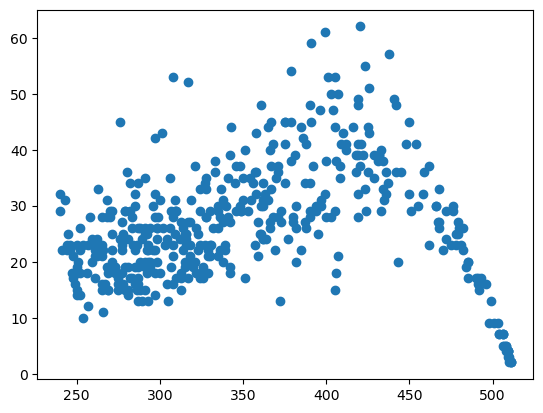

In [17]:
import matplotlib.pyplot as plt
#plt.scatter(two_largest_components[:,0],num_components,alpha=0.5)
plt.scatter(oldx, oldy)
#oldx = two_largest_components[:,0]
#oldy = num_components
#plt.scatter(two_largest_components[:,0],two_largest_components[:,1],alpha=0.5)
#plt.scatter(0.5*two_largest_components2[:,0],0.5*two_largest_components2[:,1],color="orange",alpha=0.5)
#plt.plot(np.linspace(256,512,100), np.linspace(256,0,100))
#plt.scatter(two_largest_components[0,0],two_largest_components[0,1])

In [16]:
for i in range(number_split_runs):
    print(oldx[i], oldy[i])

382.0 26.0
276.0 24.0
314.0 22.0
291.0 25.0
462.0 37.0
288.0 26.0
509.0 4.0
381.0 39.0
258.0 28.0
283.0 26.0
313.0 18.0
268.0 28.0
250.0 14.0
492.0 15.0
431.0 38.0
433.0 29.0
458.0 32.0
332.0 26.0
293.0 22.0
308.0 23.0
315.0 20.0
267.0 16.0
279.0 19.0
265.0 15.0
298.0 26.0
310.0 29.0
365.0 31.0
310.0 29.0
371.0 36.0
351.0 40.0
358.0 36.0
251.0 20.0
342.0 19.0
269.0 15.0
485.0 17.0
318.0 23.0
476.0 30.0
356.0 34.0
407.0 50.0
296.0 30.0
366.0 27.0
419.0 48.0
293.0 20.0
359.0 21.0
320.0 19.0
363.0 32.0
405.0 44.0
390.0 28.0
279.0 24.0
491.0 17.0
285.0 32.0
361.0 25.0
466.0 30.0
346.0 29.0
362.0 24.0
343.0 44.0
476.0 29.0
266.0 22.0
291.0 35.0
419.0 28.0
301.0 43.0
282.0 17.0
335.0 29.0
324.0 33.0
358.0 32.0
287.0 13.0
507.0 5.0
375.0 34.0
240.0 29.0
288.0 15.0
508.0 4.0
419.0 41.0
299.0 28.0
327.0 23.0
327.0 34.0
406.0 18.0
506.0 7.0
362.0 30.0
331.0 23.0
329.0 21.0
244.0 22.0
308.0 16.0
481.0 23.0
300.0 31.0
338.0 20.0
406.0 38.0
265.0 21.0
317.0 17.0
511.0 2.0
418.0 36.0
501.0 9.0
357.0

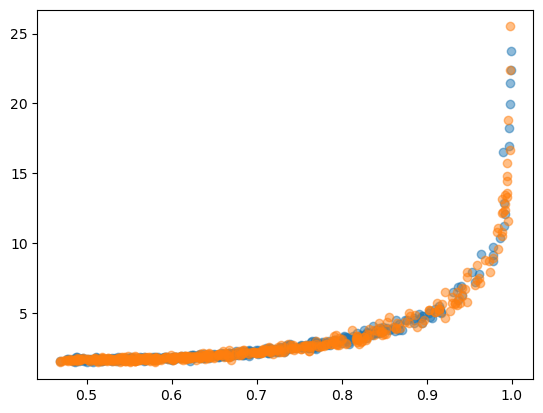

In [62]:
#old_1 = two_largest_components[:,0]
#old_2 = run_times
#plt.scatter(old_1*2, old_2*4)
#del_moves_1024 = del_moves
#two_largest_components1024 = two_largest_components
plt.scatter(two_largest_components1024[:,0]/1024, (1024*1023/2-del_moves_1024)/1024,alpha=0.5)
#plt.plot([500,1000],[1000,1000])
plt.scatter(two_largest_components[:,0]/512, (512*511/2-del_moves)/512, alpha=0.5)

In [69]:
for i, val in enumerate(two_largest_components1024[:,0]):
    print('%.3f'%(val/1024), '%.3f'%((1024*1023/2-del_moves_1024[i])/1024))

0.722 2.421
0.676 2.258
0.603 1.838
0.839 3.583
0.494 1.703
0.763 2.587
0.931 6.485
0.772 2.828
0.510 1.603
0.692 2.188
0.805 3.120
0.753 2.596
0.841 3.558
0.486 1.471
0.770 2.536
0.940 6.939
0.796 2.904
0.771 2.760
0.785 2.820
0.978 9.165
0.624 1.916
0.512 1.679
0.493 1.657
0.752 2.542
0.769 2.955
0.979 9.722
0.705 2.281
0.828 3.465
0.514 1.585
0.711 2.454
0.805 2.952
0.729 2.386
0.768 2.472
0.739 2.799
0.685 2.209
0.999 23.779
0.594 1.791
0.858 3.825
0.684 2.194
0.990 16.520
0.768 2.690
0.535 1.679
0.477 1.688
0.600 1.784
0.504 1.662
0.552 1.813
0.748 2.514
0.729 2.401
0.552 1.655
0.636 1.737
0.552 1.731
0.915 5.259
0.668 1.957
0.583 1.665
0.809 2.739
0.848 3.598
0.802 3.186
0.522 1.589
0.650 2.076
0.511 1.738
0.513 1.763
0.705 2.172
0.731 2.383
0.732 2.190
0.683 1.971
0.902 4.986
0.771 2.847
0.524 1.723
0.531 1.586
0.906 4.612
0.840 3.778
0.666 1.920
0.953 7.896
0.599 1.688
0.836 3.480
0.496 1.591
0.633 2.024
0.578 1.799
0.631 1.893
0.577 1.675
0.494 1.661
0.487 1.656
0.511 1.800
0.

(array([46., 77., 61., 52., 50., 35., 39., 23., 24., 34.]),
 array([240. , 267.1, 294.2, 321.3, 348.4, 375.5, 402.6, 429.7, 456.8,
        483.9, 511. ]),
 <BarContainer object of 10 artists>)

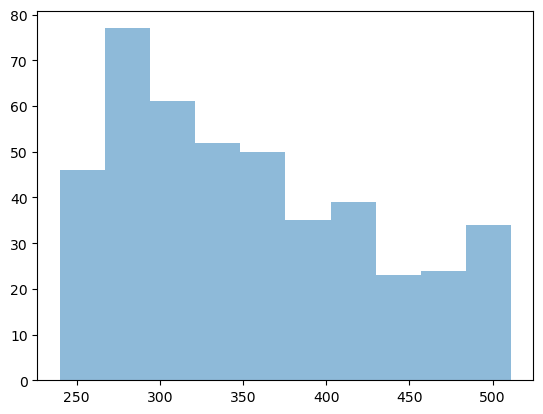

In [32]:
#plt.hist(old_1*2, alpha=0.5)
plt.hist(two_largest_components[:,0], alpha =0.5)

In [33]:
y = np.array([59., 52., 56., 55., 67., 43., 38., 25., 19., 18.])
x = np.array([ 480. ,  534.3,  588.6,  642.9,  697.2,  751.5,  805.8,  860.1,
         914.4,  968.7, 1023. ])

for i in range(10):
    print("(",x[i],",",y[i],")")

( 480.0 , 59.0 )
( 534.3 , 52.0 )
( 588.6 , 56.0 )
( 642.9 , 55.0 )
( 697.2 , 67.0 )
( 751.5 , 43.0 )
( 805.8 , 38.0 )
( 860.1 , 25.0 )
( 914.4 , 19.0 )
( 968.7 , 18.0 )
